In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


image shape:(720, 1280, 3)


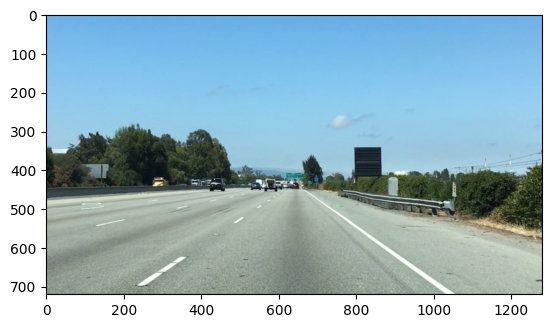

In [2]:
image_name = 'test.jpg'
street = mpimg.imread(image_name)
region_select = np.copy(street)
color_select = np.copy(street)
x_size = street.shape[1]
y_size = street.shape[0]
print(f'image shape:{street.shape}')
plt.imshow(street)

In [3]:
left_bottom = [190, 720]
right_bottom = [1070, 720]
apex = [650, 420]

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

xx, yy = np.meshgrid(np.arange(0, x_size), np.arange(0, y_size))

region_threshold = (yy > (xx * fit_left[0] + fit_left[1])) & \
             (yy > (xx * fit_right[0] + fit_right[1])) & \
             (yy < (xx * fit_bottom[0] + fit_bottom[1]))


In [4]:
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

color_threshold = (street[:, :, 0] < rgb_threshold[0])|\
                  (street[:, :, 1] < rgb_threshold[1])|\
                  (street[:, :, 2] < rgb_threshold[2])

In [5]:


color_select[~region_threshold | color_threshold] = [0,0,0]
region_select[~color_threshold & region_threshold] = [255, 0, 0]


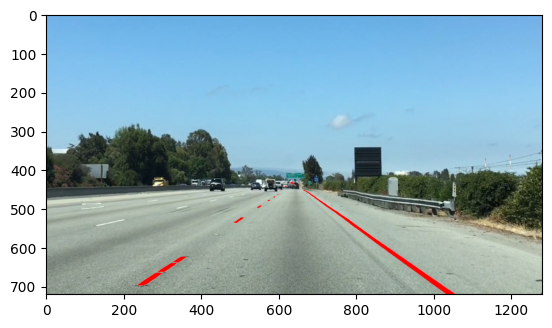

In [6]:
plt.imshow(region_select)



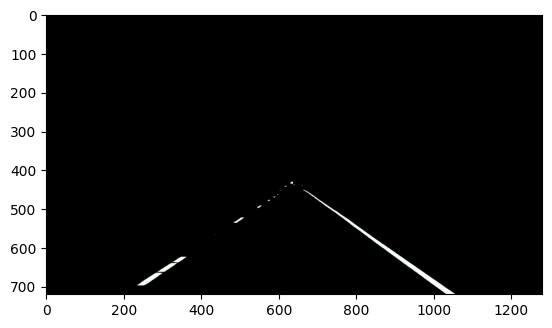

In [7]:
plt.imshow(color_select)

In [9]:
plt.imsave("region_color.jpg", region_select)